
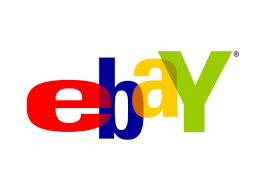

## <font color ='green'> GETTING THE BEST PHONE WHEN BUYING ONLINE .</font>

We are looking for the following features in a iphone that has the best of the following attributes in ebay website through web scraping. Product_Name,State,Price,Shipping,Shipping_Cost,Items_sold
1. Type of phone.
2. State(refurbised or new)
3. The price.
4. Shipping Location.
5. Shipping Cost.
6. No of items Sold


In [240]:
# import the library necessary for the web scraping.
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

In [241]:
my_url ="https://www.ebay.com/sch/i.html?_from=R40&_trksid=m570.l1313&_nkw=iphone&_sacat=15032&LH_TitleDesc=0&_osacat=15032&_odkw=new+iphone"

In [242]:
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html, "html.parser")

The container where all this information is in.

In [243]:
containers = page_soup.findAll("div",{'class',"s-item__wrapper clearfix"})
print(len(containers))


62


In [130]:
print(soup.prettify(containers[0]))

<div class="s-item__wrapper clearfix">
 <div class="s-item__image-section">
  <div class="s-item__image">
   <a _sp="p2351460.m1686.l7400" aria-hidden="true" data-track='{"eventFamily":"LST","eventAction":"ACTN","actionKind":"NAVSRC","actionKinds":["NAVSRC"],"operationId":"2351460","flushImmediately":false,"eventProperty":{"moduledtl":"mi:1686|iid:1|li:7400|luid:1|scen:UnifiedRankingScenario","parentrq":"64695de01710aa12f2934f6afffd833c","pageci":"67709ac5-7b34-11ea-9309-74dbd180988d"}}' href="https://www.ebay.com/itm/Apple-iPhone-8-Plus-64GB-256GB-A1864-GSM-Unlocked-Smartphone-All-Colors/392308524684?_trkparms=ispr%3D1&amp;hash=item5b5769068c:m:mz_ydL1Wsxh_-yPMcJfdIDw&amp;enc=AQAEAAACUBPxNw%2BVj6nta7CKEs3N0qXnM4PSL%2FcHwuc%2BFWWqP6MyiPfYk1%2FWiA48yYKwHiRY%2BgPib3w5qEYfQ2DvEoqfHHkbK88MSR%2Bnfp2xITNLshySdfIOuMzt6s4BrND32xDS7c1dXQfjoh4rbnnOiApki%2FjlwNzKtzt%2BKtCJlrI5FH%2FaRxI0CkL3nXF6kpm84lA4yQGAQTxDNT3v0DQJzO2z2hRJFk%2BQEg408UEgn85o8%2F%2FxOmj7xzLP2AT%2FgV3Ud5FBL5UnvYufw42uzMnC4fqiJBl9

In [244]:
container=containers[0]
print(container.div.img['alt']) # the title of the object that we are scraping  oje

Apple iPhone 8 Plus 64GB 256GB A1864 GSM Unlocked Smartphone All Colors


In [245]:
condition_item=container.findAll("div",{"class":"s-item__subtitle"}) #reburshished or new
print(condition[0].text)

AttributeError: 'str' object has no attribute 'text'

In [246]:
# Reviews
reviews=container.findAll("div",{"class":"s-item__reviews"}) # Reviews for phone
print(reviews[0].text)

IndexError: list index out of range

In [247]:
price=container.findAll("span",{"class":"s-item__price"})
print(price[0].text)

$542.52 to $637.15


In [248]:
shipped_location = container.findAll('span',{"class":"s-item__location s-item__itemLocation"})
print(shipped_location[0].text)                            

From China


In [249]:
shipping_Cost = container.findAll('span',{"class":"s-item__shipping s-item__logisticsCost"})
print(shipping_Cost[0].text)

Free International Shipping


In [275]:
Items_Sold = container.findAll('span',{'class','s-item__hotness s-item__itemHotness'})
print(Items_Sold[0].text) 

Only 1 left!


In [292]:
filename = "ebayiphones.csv"
f = open(filename,"w")

In [293]:
headers="product_name,price,shipping_Location,shipping_Cost,Items_sold\n"
f.write(headers)

62

In [294]:
def uprint(*objects, sep=' ', end='\n', file=sys.stdout):
    enc = file.encoding
    if enc == 'UTF-8':
        print(*objects, sep=sep, end=end, file=file)
    else:
        f = lambda obj: str(obj).encode(enc, errors='backslashreplace').decode(enc)
        print(*map(f, objects), sep=sep, end=end, file=file)

for container in containers:
    try:
        product_name = container.div.img["alt"]
    except:
        Name = None
    try:
        price_container = container.findAll("span",{"class":"s-item__price"})
        price = price_container[0].text # the strip function removes unnesesary comma spaces and iterations    
    except:
        Name = None
    try:
        shipping_Location_container = container.findAll('span',{"class":"s-item__location s-item__itemLocation"})
        shipping_Location = shipping_Location_container[0].text # the strip function removes unnesesary comma spaces and iterati    
    except:
        Name =None
    try:
        shipping_Cost_container = container.findAll('span',{"class":"s-item__shipping s-item__logisticsCost"})
        shipping_Cost = shipping_Cost_container[0].text # the strip function removes unnesesary comma spaces and iteration.   
    except:
        Name = None
    try:
        Items_Sold_container = container.findAll('span',{'class','s-item__hotness s-item__itemHotness'})
        Items_Sold = Items_Sold_container[0].text
    except:
        Name =None 
    print("product_name:" + product_name)
    print ("condition_item :" + condition_item)
    print("price :"+ price)
    print("shipping_Location :" + shipping_Location) 
    print ("shipping_Cost :" + shipping_Cost)
    print("Items_Sold :"+ Items_Sold)
    
    #uprint(product_name +","+ shipping_Cost +","+ shipping_Location +","+ condition_item +"\n") 
    f.write(product_name +","+ price +","+ shipping_Location +","+ shipping_Cost +","+ Items_Sold +"\n")
    
f.close()

product_name:Apple iPhone 8 Plus 64GB 256GB A1864 GSM Unlocked Smartphone All Colors
condition_item :Open Box
price :$542.52 to $637.15
shipping_Location :From China
shipping_Cost :Free International Shipping
Items_Sold :746+ Sold
product_name:Apple iPhone 7 Plus 32GB 128GB 256GB 12.0MP iOS Mobile Smartphone All Colours
condition_item :Open Box
price :$361.57 to $468.80
shipping_Location :From China
shipping_Cost :Free International Shipping
Items_Sold :473+ Sold
product_name:Apple iPhone 8 plus 64gb free + new + warranty + Invoice +8 accessories
condition_item :Open Box
price :$425.51
shipping_Location :From Spain
shipping_Cost :+$27.35 shipping
Items_Sold :36+ Sold
product_name:NEW Apple iPhone 7 PLUS 32GB 128GB 256GB Factory Unlocked All Carrier All Colors
condition_item :Open Box
price :$384.00 to $474.00
shipping_Location :From United States
shipping_Cost :+$38.60 shipping
Items_Sold :4+ Watching
product_name:Apple iPhone 7 Plus 128GB Matte Black Unlocked Mobile phone Smartphone A

product_name:Apple iPhone 8 Plus (PRODUCT) RED - 64GB - (Unlocked) (GSM) Very good condition.
condition_item :Open Box
price :$365.00
shipping_Location :From Korea, South
shipping_Cost :+$20.00 shipping
Items_Sold :46 Watching
product_name:Apple iPhone 6 - 16gb-silver (unlocked) a1549 (CDMA + GSM)
condition_item :Open Box
price :$76.57
shipping_Location :From Spain
shipping_Cost :+$32.82 shipping
Items_Sold :46 Watching
product_name:Apple iPhone 6S  128GB - Rose Gold (Unlocked)
condition_item :Open Box
price :$148.38
shipping_Location :From United Kingdom
shipping_Cost :+$18.70 shipping
Items_Sold :46 Watching
product_name:IPhone xs max 256gb
condition_item :Open Box
price :$764.60
shipping_Location :From Spain
shipping_Cost :+$38.27 shipping
Items_Sold :46 Watching
product_name:For iPhone 7plus 4G Smartphone 7MP+12MP 4G Network Cellphone 3+128GB
condition_item :Open Box
price :$475.46 to $545.22
shipping_Location :From China
shipping_Cost :Free International Shipping
Items_Sold :46 Wa